# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [152]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
from plotly import offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [153]:
PLOTLY_API_SECRET = !cat ~/.secrets/apikeys | grep PLOTLY | cut -d '=' -f 2 | tr -d '"'
tls.set_credentials_file(
    username='colejhudson', 
    api_key=PLOTLY_API_SECRET[0]
)

init_notebook_mode(connected=True)

In [103]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

data = pd.read_csv(url, index_col=None, header=None)

In [105]:
# According to http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names
# There should be 306 instances and 4 columns
data.shape == (306,4)

True

In [106]:
# No missing values!
data.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [107]:
# Adding informative feature names
data.columns = ['age', 'year','nodes_count','did_survive']

In [108]:
# Swap 2 for 0 to represent non-survival
data['did_survive'] = data['did_survive'].replace({2: 0})

In [109]:
data.head()

,age,year,nodes_count,did_survive
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [110]:
data.describe()

,age,year,nodes_count,did_survive
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [111]:
data.corr()

,age,year,nodes_count,did_survive
age,1.000000,0.089529,-0.063176,-0.067950
year,0.089529,1.000000,-0.003764,0.004768
nodes_count,-0.063176,-0.003764,1.000000,-0.286768
did_survive,-0.067950,0.004768,-0.286768,1.000000


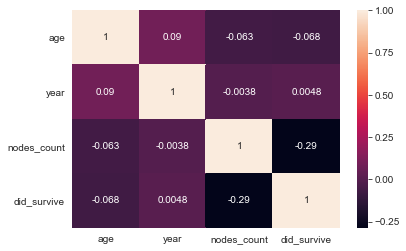

In [112]:
sns.heatmap(data.corr(), annot=True)

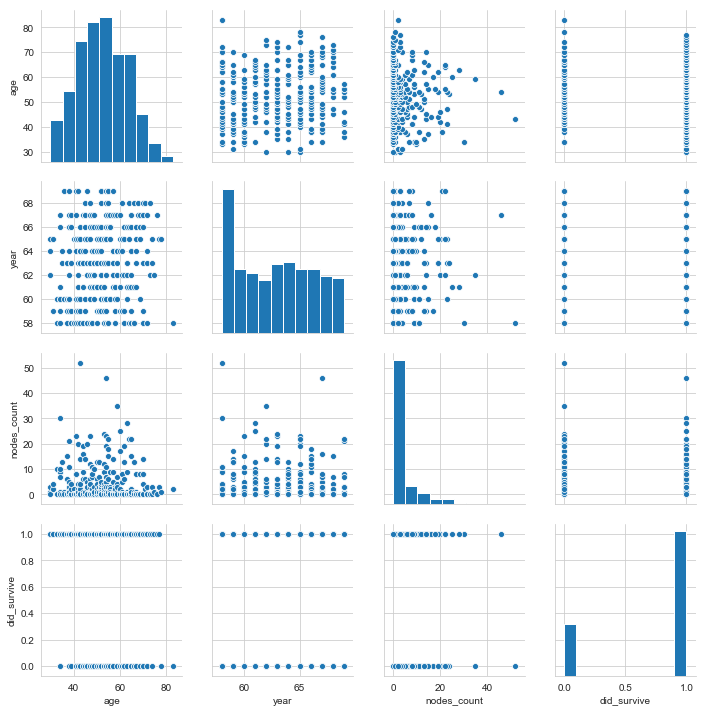

In [113]:
sns.pairplot(data)

In [114]:
# This one is interesting, I think this is telling me that there are people in the data set
# who died regardless of having positive axillary nodes, thus this is a potential confounding
# variable if we try to predict the survival rate from the count of such nodes. One might
# be led to doing that because in the heatmap above, `nodes_count` seems to be the most
# strongly correlated with `did_survive`.

pd.crosstab(data['did_survive'], data['nodes_count'], normalize='columns')

nodes_count,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,28,30,35,46,52
did_survive,,,,,,,,,,,,,,,,,,,,,
0,0.139706,0.195122,0.25,0.35,0.230769,0.666667,0.428571,0.285714,0.285714,0.666667,...,1.0,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.860294,0.804878,0.75,0.65,0.769231,0.333333,0.571429,0.714286,0.714286,0.333333,...,0.0,0.666667,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


In [115]:
# Here we can see that it's hard to actually say to what degree a high node_count is predictive of survival, while
# the trend is in the direction of anticorrelation betweeen the two features, we can see that we have 100% survival
# and death rates at the upper end of the spectrum if only because high node counts are unlikely to occur, hence
# those are probably situations in which we're already dealing with many conditional probabilities and so to ask
# whether nodes_count is indicative of death for these outliers might be misleading.

pd.crosstab(data['did_survive'], data['nodes_count'], normalize='columns').loc[:,15:]

nodes_count,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
did_survive,,,,,,,,,,,,,,,,
0,0.666667,0.0,1.0,0.0,0.666667,0.5,1.0,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.333333,1.0,0.0,1.0,0.333333,0.5,0.0,0.666667,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


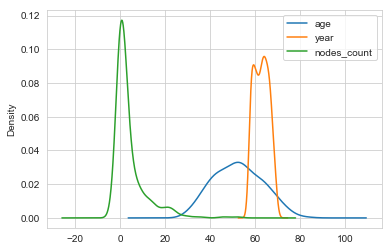

In [161]:
# This gives us a very good indicate of where the data is located, the years are clustered in the 60s, and
# the ages are mostly of those in midlife. Our nodes_count has a positive skew as well, so we would expect the
# mean to exceed the median

data.drop(columns=['did_survive']).plot.density()

In [164]:
# Here we can see that the mean is greater than the median, thus nodes_count has positive skew

data['nodes_count'].median(), data['nodes_count'].mean()

(1.0, 4.026143790849673)

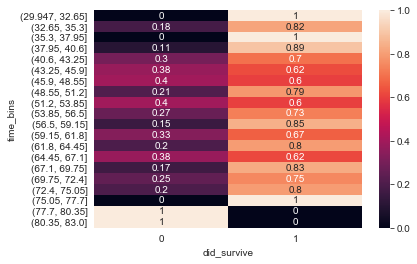

In [236]:
a = pd.cut(data['age'], 20)
b = data['did_survive']

tab = pd.crosstab(a, b, rownames=['time_bins'], colnames=['did_survive'], normalize='index')
sns.heatmap(tab, annot=True)

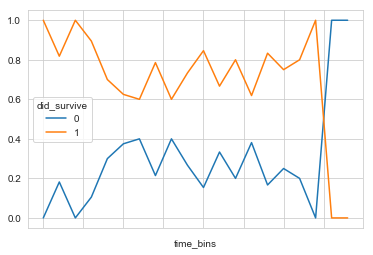

In [237]:
tab = pd.crosstab(a, b, rownames=['time_bins'], colnames=['did_survive'], normalize='index')
tab.plot.line()

In [159]:
bubbles_mpl = plt.figure()
plt.scatter(data['age'], data['nodes_count'])

plotly_fig = tls.mpl_to_plotly(bubbles_mpl)
py.iplot(plotly_fig, filename='data-scatter')

/Users/work/.pyenv/versions/3.6.4/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [189]:
nodes_by_year = data[['year','nodes_count']].head()
nodes_by_year['media_'] np.zeros(nodes_by_year.shape[0])

for year in nodes_by_year['year'].unique():
    cohort = nodes_by_year[nodes_by_year['year'] == year]
    cohort.median()

array([64, 62, 65, 59, 58, 60, 66, 61, 67, 63, 69, 68])

In [217]:
# A list of nodes_count group by year
nodes_by_year = pd.crosstab(data['nodes_count'], data['year'])
nodes_by_year.head()

year,58,59,60,61,62,63,64,65,66,67,68,69
nodes_count,,,,,,,,,,,,
0,16,8,11,11,9,14,17,13,15,11,8,3
1,6,1,7,4,3,4,4,2,3,5,1,1
2,3,8,1,2,1,1,1,0,1,1,1,0
3,3,2,2,0,3,1,1,2,1,2,0,3
4,2,0,2,1,0,2,1,2,2,0,1,0


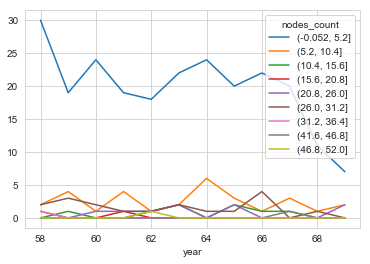

In [206]:
# Here we can see that as the years increase, the number of people found having between 0 and 5 nodes decreased
# indicating either that people stopped report, less data was gathered, an increase in preventitive medicine, a
# change in the environment, or any number of confounding variables.

node_count_cohorts = pd.cut(data['nodes_count'], 10)
pd.crosstab(data['year'], node_count_cohorts).plot.line()

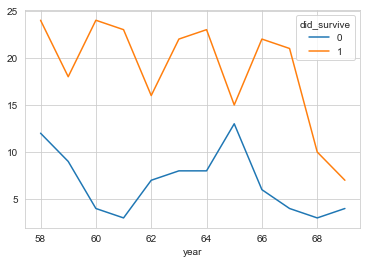

In [222]:
# This plot is interesting as well, it shows the count of people that survived and died after five years.
# As time goes on the number of people recorded as surviving falls, but theres only a small uptick in the
# number of individuals recorded as dying. It's curious that these lines aren't exact reflections of one 
# another. For the most part they do, until about 1967 when the number of people surviving falls but the
# the number of people dying does not rise. This suggests a change in enviornment meant to me, likely one
# that prevents people from getting positive nodes in the first place.

pd.crosstab(data['year'], data['did_survive'], ).plot.line()

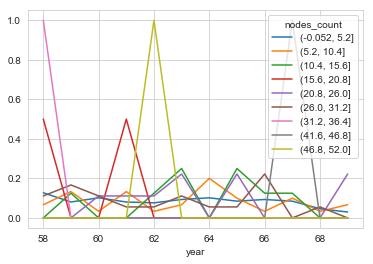

In [211]:
# Just to guess about our assumptions, we can see here that normalizing the data doesn't actually do us any favors
# with regard to year and nodes_count because of how little data we have at the top end. If you literally 
# 'look through the noise' you can see that our blue line - the first cohort - is rather stable, and thus likely
# to be trustworthy

pd.crosstab(data['year'], node_count_cohorts, normalize='columns').plot.line()

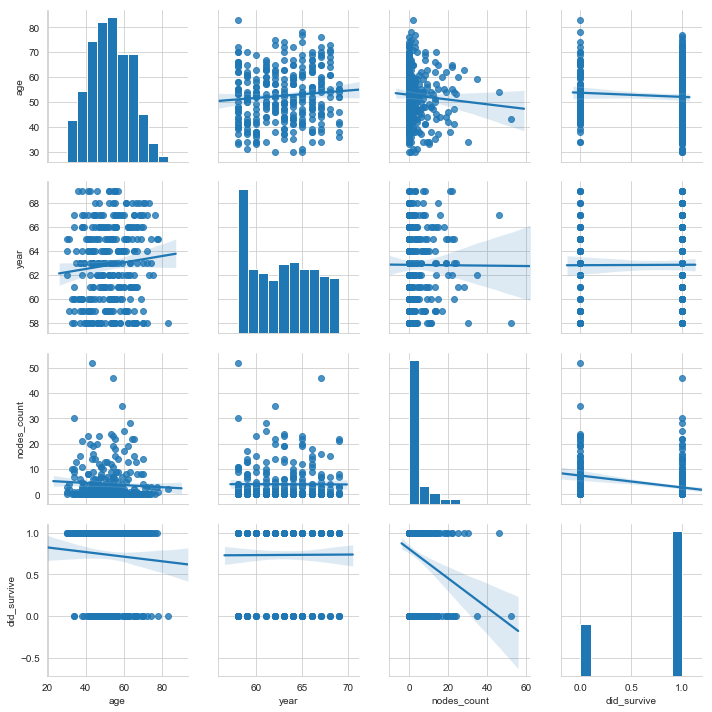

In [204]:
sns.pairplot(data, kind='reg')

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Answers:
- The `year` feature seems to be very positively correlated with survival, but not in an obvious manner,
from the immediate structure of the data. Looking at both the `nodes_count` and `did_survive` over each 
`year` in the line plots above - [221] and [222] - you can see that the number of people reported as
dying in 5 years or less, more or less reflects the number of individuals who survived longer than 5 years,
until approximately 1967 when the number of people recorded as surviving falls, but the number of those
who don't survive does _not_ rise! This is likely do to an environment change, such as better medicine, 
a change in reporting methods, a nuclear war that killed 80% of the population, etc. But of the things we care
about those who had there operation in the late 1960s were much more likely to survive.
- `nodes_count` and `did_survive` have a pretty clear negative correlation, in that if you more nodes detected
your less likely to survive five years after your operation. Intuitively, this is what we would expect as 
those predisposed to have detected more nodes will also be more likely to regenerate them later on, likey as
a factor of their environment - e.g. genes, work, location, etc.
- Likely there exists some enviornmental connection between the number of nodes detected during surgery and 
the the year of the surgery. For example, one story you might derive is that between the spike in deaths from
those who received surgery in 1965 and those who received surgery after, some sort of medical breakthrough
occured which allowed surgeons to be more thorough. If we look at the drop in survival rate that occured over
the same time, it seems more likely that whatever was causing breat cancer became less common in the enviornment,
hence requiring less surgeries and less people being measured.